### PCA

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,adjusted_rand_score
from sklearn.impute import SimpleImputer

#### Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.


In [50]:
df = pd.read_csv('wine.csv')
df.shape

(178, 14)

In [51]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [53]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [54]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [55]:
y = df['Type']
X = df.drop(columns=['Type'])

##### 2.	Examine the distribution of features using histograms, box plots, or density plots.

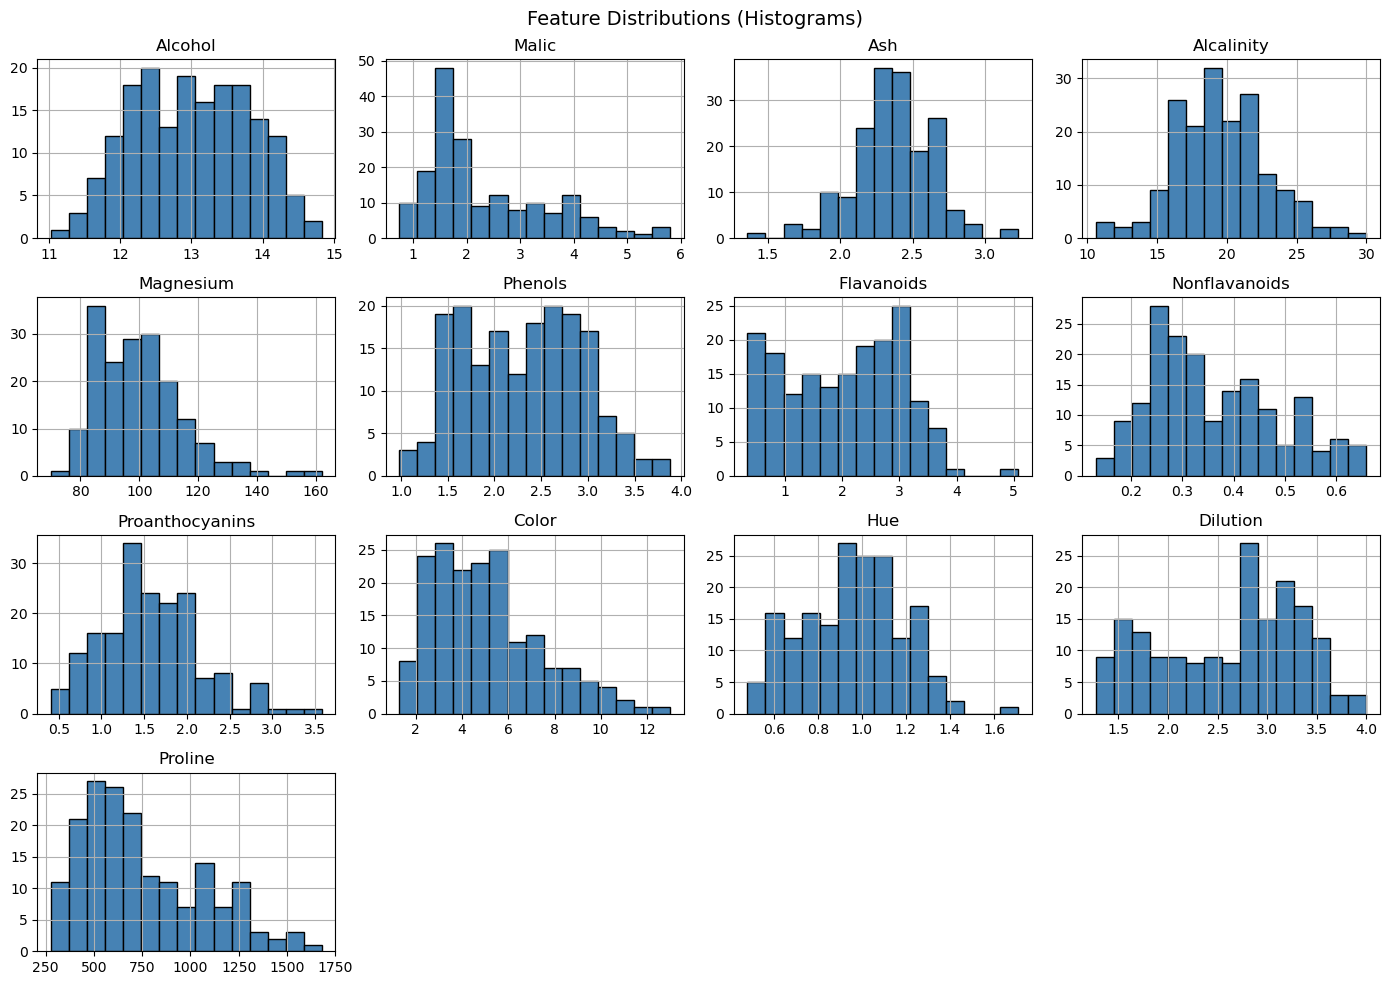

In [56]:
X.hist(figsize=(14, 10), bins=15, color='steelblue', edgecolor='black')
plt.suptitle("Feature Distributions (Histograms)", fontsize=14)
plt.tight_layout()
plt.show()

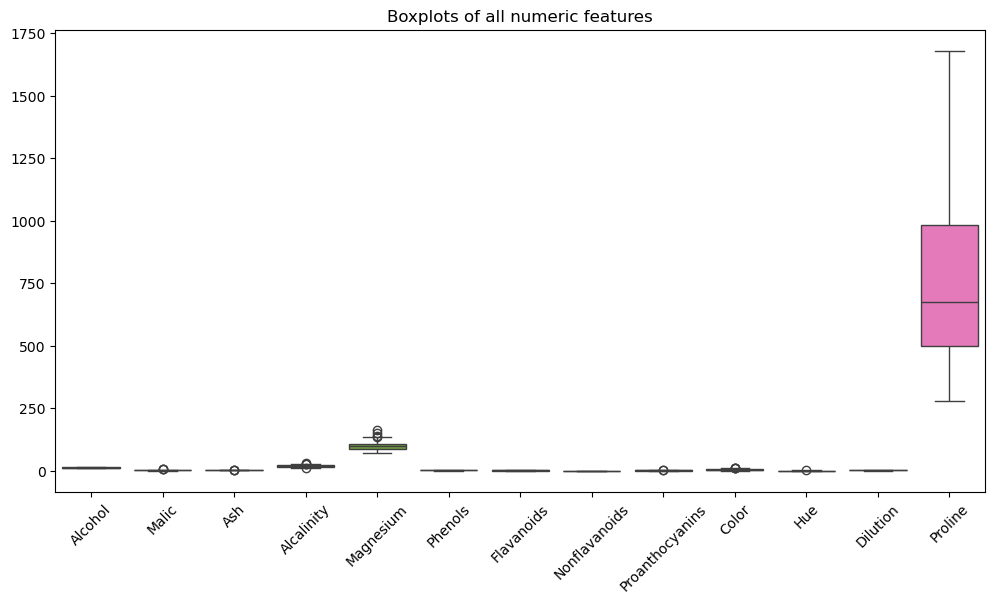

In [57]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title("Boxplots of all numeric features")
plt.show()

##### 3.	Investigate correlations between features to understand relationships within the data.

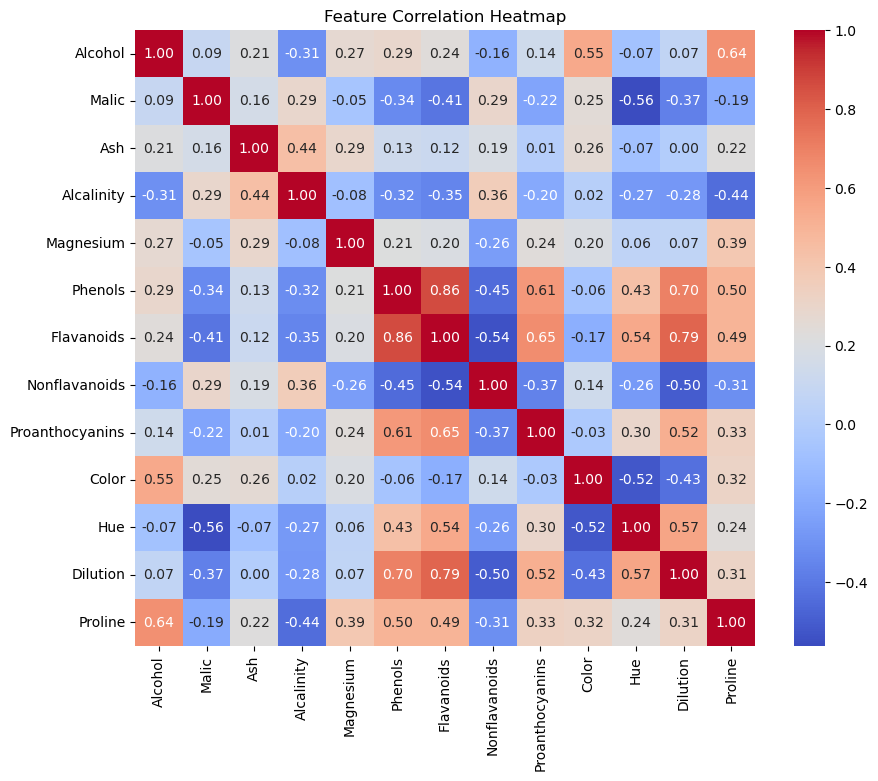

In [58]:
corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


#### Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.


In [59]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [60]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [61]:
explained_var = np.cumsum(pca.explained_variance_ratio_)
explained_var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

##### 2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

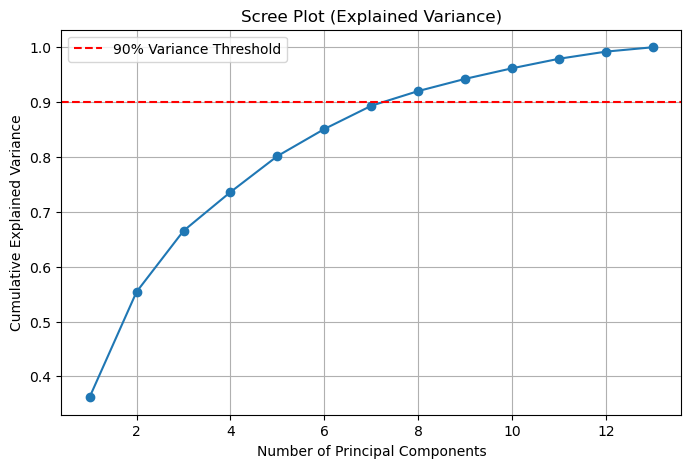

In [62]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(explained_var)+1), explained_var, marker='o')
plt.axhline(0.9, color='red', linestyle='--', label='90% Variance Threshold')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot (Explained Variance)")
plt.legend()
plt.grid(True)
plt.show()

In [63]:
n_components_90 = np.argmax(explained_var >= 0.90) + 1
n_components_90

np.int64(8)

##### 3.	Transform the original dataset into the principal components.

In [64]:
pca_final = PCA(n_components=n_components_90)
X_pca_final = pca_final.fit_transform(X_scaled)
X_pca_final

array([[ 3.31675081,  1.44346263, -0.16573904, ...,  0.22388013,
         0.59642655, -0.06513909],
       [ 2.20946492, -0.33339289, -2.02645737, ...,  0.92712024,
         0.05377561, -1.02441595],
       [ 2.51674015,  1.0311513 ,  0.98281867, ..., -0.54927605,
         0.42420545,  0.34421613],
       ...,
       [-2.67783946,  2.76089913, -0.94094188, ..., -0.27306792,
         0.67923541, -0.0470238 ],
       [-2.38701709,  2.29734668, -0.5506962 , ..., -1.17878298,
         0.63397527, -0.39082877],
       [-3.20875816,  2.76891957,  1.01391366, ..., -0.29609218,
         0.00574126,  0.29291373]])

#### Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.


In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
sil_scores = []
for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))
sil_scores

[np.float64(0.25931695553182543),
 np.float64(0.2848589191898987),
 np.float64(0.26017035223704527),
 np.float64(0.2016190829407409)]

##### 2.	Visualize the clustering results using appropriate plots.

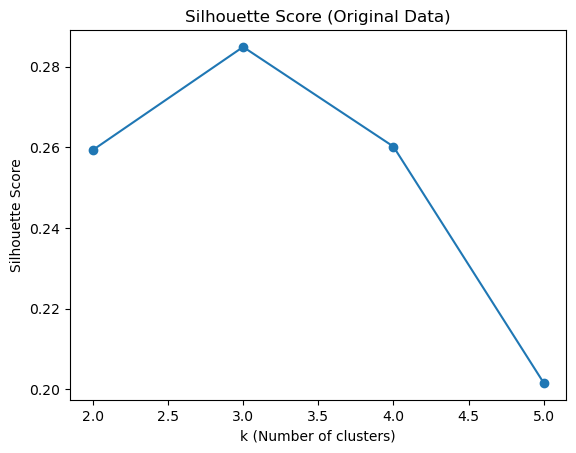

In [67]:
plt.plot(range(2,6), sil_scores, marker='o')
plt.title("Silhouette Score (Original Data)")
plt.xlabel("k (Number of clusters)")
plt.ylabel("Silhouette Score")
plt.show()

In [68]:
best_k = np.argmax(sil_scores) + 2
best_k

np.int64(3)

##### 3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [69]:
kmeans_orig = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_orig

KMeans(n_clusters=np.int64(3), n_init=10, random_state=42)

In [70]:
labels_orig = kmeans_orig.fit_predict(X_scaled)
labels_orig

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [71]:
silhouette_score(X_scaled, labels_orig)

np.float64(0.2848589191898987)

In [72]:
davies_bouldin_score(X_scaled, labels_orig)

np.float64(1.389187977718165)

#### Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.


In [73]:
sil_scores_pca = []
for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_pca = km.fit_predict(X_pca_final)
    sil_scores_pca.append(silhouette_score(X_pca_final, labels_pca))
sil_scores_pca

[np.float64(0.293004832203901),
 np.float64(0.31496969547055614),
 np.float64(0.2846414058368014),
 np.float64(0.2683445820350234)]

##### 2.	Visualize the clustering results obtained from PCA-transformed data.

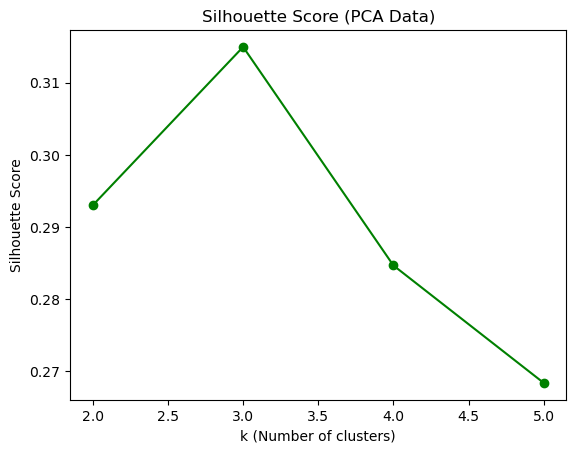

In [74]:
plt.plot(range(2,6), sil_scores_pca, marker='o', color='green')
plt.title("Silhouette Score (PCA Data)")
plt.xlabel("k (Number of clusters)")
plt.ylabel("Silhouette Score")
plt.show()

In [75]:
best_k_pca = np.argmax(sil_scores_pca) + 2
best_k_pca

np.int64(3)

##### 3.	Compare the clustering results from PCA-transformed data with those from the original dataset.

In [76]:
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42, n_init=10)
kmeans_pca

KMeans(n_clusters=np.int64(3), n_init=10, random_state=42)

In [77]:
labels_pca = kmeans_pca.fit_predict(X_pca_final)
labels_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [78]:
silhouette_score(X_pca_final, labels_pca)

np.float64(0.31496969547055614)

In [79]:
davies_bouldin_score(X_pca_final, labels_pca)

np.float64(1.266881831497218)

#### Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.


In [80]:
ari = adjusted_rand_score(labels_orig, labels_pca)
ari

1.0

In [84]:
pd.crosstab(y, labels_orig, rownames=['True Type'], colnames=['Cluster'])

Cluster,0,1,2
True Type,,,
1,0,0,59
2,65,3,3
3,0,48,0


In [86]:
pd.crosstab(y, labels_pca, rownames=['True Type'], colnames=['Cluster'])

Cluster,0,1,2
True Type,,,
1,0,0,59
2,65,3,3
3,0,48,0


#### Task 6: Conclusion and Insights

1.	Summarize the key findings and insights from the assignment.
2.	Discuss the practical implications of using PCA and clustering in data analysis.
3.	Provide recommendations for when to use each technique based on the analysis conducted.


#### Insights:

PCA reduces dimensionality, speeding up clustering.

Clustering on PCA often preserves structure if explained variance is high.

Some fine-grained differences may be lost when using PCA.

#### Conclusion

PCA helps visualize high-dimensional data in 2D/3D.

Clustering on PCA data can reduce computational cost.

If interpretability of original features is important, use clustering on original data.

For large datasets, PCA + clustering is practical.